<a href="https://colab.research.google.com/github/JesseJames50/python_economia/blob/main/previsao_preco_dolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nasdaq-data-link
!pip install yfinance

In [2]:
#Importando bibliotecas
import nasdaqdatalink
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
chave = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx'
nasdaqdatalink.ApiConfig.api_key = chave

In [4]:
juros_reais_EUA = nasdaqdatalink.get('FRED/EFFR')
juros_reais_EUA

,Value
Date,
2000-07-03,7.03
2000-07-05,6.52
2000-07-06,6.51
2000-07-07,6.42
2000-07-10,6.51
...,...
2022-07-11,1.58
2022-07-12,1.58
2022-07-13,1.58


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     107.2
Date:                Sat, 15 Jun 2024   Prob (F-statistic):           2.75e-25
Time:                        18:51:19   Log-Likelihood:                -139.10
No. Observations:                 100   AIC:                             284.2
Df Residuals:                      97   BIC:                             292.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0397      0.099     61.169      0.0

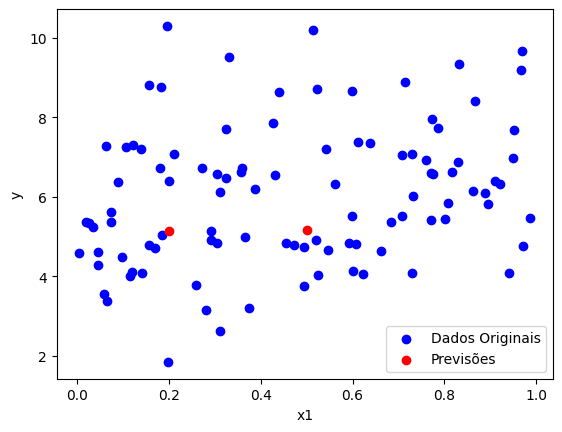

In [5]:
#Exemplo com escalonamento dos dados
import numpy as np
import pandas as pd
from statsmodels.api import OLS, add_constant
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Gerar dados sintéticos
np.random.seed(42)
n_samples = 100
x1 = np.random.rand(n_samples)
x2 = np.random.rand(n_samples)
y = 3 + 2 * x1 + 4 * x2 + np.random.randn(n_samples)

# Criar DataFrame com os dados
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# Escalonamento das variáveis independentes
scaler = StandardScaler()
X = df[['x1', 'x2']]
X_scaled = scaler.fit_transform(X)
X_scaled = add_constant(X_scaled)  # Adicionar a constante
y = df['y']

# Ajustar o modelo
model = OLS(y, X_scaled).fit()

# Exibir o resumo do modelo
print(model.summary())

# Prevendo novos dados com transformação
novos_dados = {
    'x1': [0.5, 0.2],
    'x2': [0.3, 0.4]
}
novo_df = pd.DataFrame(novos_dados)
novo_X = scaler.transform(novo_df)  # Escalonar os novos dados
novo_X = add_constant(novo_X)  # Adicionar a constante

# Exibir a estrutura dos dados de previsão
print("Estrutura de novo_X com constante adicionada:")
print(novo_X)

# Prevendo os novos valores de y
previsao = model.predict(novo_X)
print("Previsões:", previsao)

# Plot para visualização
plt.scatter(x1, y, color='blue', label='Dados Originais')
plt.scatter(novo_df['x1'], previsao, color='red', label='Previsões')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.show()


# Previsão do Preço do Dólar
## modelo OLS (Ordinary Least Squares) Regression - Regressão Linear
Descrição do Modelo -
A regressão linear busca modelar a relação entre uma variável dependente
𝑦
y e uma ou mais variáveis independentes
𝑋
X ajustando uma linha (ou hiperplano no caso de múltiplas variáveis independentes) que minimize a soma dos quadrados das diferenças entre os valores reais
𝑦
y e os valores preditos
𝑦
^
y
^
​
 .

Detalhes do OLS -
OLS (Ordinary Least Squares): É um método de ajuste de regressão linear que minimiza a soma dos quadrados dos resíduos (as diferenças entre os valores observados e os valores preditos pelo modelo).

In [25]:
#Modelo sem escalonamento dos dados
import requests
import pandas as pd
from statsmodels.api import OLS, add_constant
import nasdaqdatalink
from datetime import datetime

nasdaqdatalink.ApiConfig.api_key = chave

# Função para coletar dados da API do Banco Central do Brasil
def coletar_dados_bcb(codigo_serie, data_inicial, data_final):
    url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={data_inicial}&dataFinal={data_final}'
    response = requests.get(url)

    # Verificar se a resposta da API é válida
    if response.status_code != 200:
        print(f"Erro ao acessar a API do Banco Central: {response.status_code}")
        return None

    try:
        data = response.json()
    except ValueError as e:
        print(f"Erro ao decodificar a resposta JSON: {e}")
        return None

    df = pd.DataFrame(data)
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
    df['valor'] = pd.to_numeric(df['valor'])
    df = df[(df['data'] >= data_inicial) & (df['data'] <= data_final)]
    return df

# Coletando dados de inflação, taxa de juros, balança comercial, risco país e câmbio
data_inicial = '2018-01-01'
data_final = '2024-06-13'

# Obter dados de inflação dos EUA (CPI) do Nasdaq Data Link
cpi = nasdaqdatalink.get('FRED/CPIAUCSL', start_date=data_inicial, end_date=data_final)
cpi.reset_index(inplace=True)
cpi.rename(columns={'Date': 'data', 'Value': 'cpi'}, inplace=True)
cpi['data'] = pd.to_datetime(cpi['data'])
cpi['inflacao_us'] = cpi['cpi'].pct_change() * 100 # Calcular a inflação mensal

taxa_juros_us = nasdaqdatalink.get('FRED/EFFR', start_date=data_inicial, end_date=data_final)
taxa_juros_us.reset_index(inplace=True)
taxa_juros_us.rename(columns={'Date': 'data', 'Value': 'taxa_juros_us'}, inplace=True)
taxa_juros_us['data'] = pd.to_datetime(taxa_juros_us['data'])

# Indicadores brasileiros
taxa_juros_br = coletar_dados_bcb(4189, data_inicial, data_final)  # Selic mensal
balanca_comercial = coletar_dados_bcb(22701, data_inicial, data_final)  # Balança comercial
risco_pais = coletar_dados_bcb(225, data_inicial, data_final)  # Risco País
cambio_real = coletar_dados_bcb(1, data_inicial, data_final)  # Câmbio
inflacao_br = coletar_dados_bcb(433, data_inicial, data_final)  # IPCA mensal

# Verificar se todos os DataFrames foram carregados corretamente
dataframes = [inflacao_br, cpi, taxa_juros_br, taxa_juros_us, balanca_comercial, risco_pais, cambio_real]
if any(df is None or df.empty for df in dataframes):
    print("Erro na coleta de dados. Verifique as mensagens acima.")
else:
    # Renomeando as colunas 'valor' para algo mais específico
    inflacao_br.rename(columns={'valor': 'inflacao_br'}, inplace=True)
    taxa_juros_br.rename(columns={'valor': 'taxa_juros_br'}, inplace=True)
    balanca_comercial.rename(columns={'valor': 'balanca_comercial'}, inplace=True)
    risco_pais.rename(columns={'valor': 'risco_pais'}, inplace=True)
    cambio_real.rename(columns={'valor': 'cambio_real'}, inplace=True)

    # Mesclando os dados em um único DataFrame
    df = inflacao_br.merge(cpi, on='data')
    df = df.merge(taxa_juros_br, on='data')
    df = df.merge(taxa_juros_us, on='data')
    df = df.merge(balanca_comercial, on='data')
    df = df.merge(risco_pais, on='data')
    df = df.merge(cambio_real, on='data')

    # Calculando variáveis relativas
    df['inflacao_us'] = df['cpi'].pct_change() * 100
    df['inflacao_rel'] = df['inflacao_br'] - df['inflacao_us']
    df['juros_rel'] = df['taxa_juros_br'] - df['taxa_juros_us']

    # Removendo linhas com valores ausentes
    df = df.dropna()

    # Selecionando as variáveis independentes e dependente
    X = df[['inflacao_br', 'inflacao_us', 'inflacao_rel', 'juros_rel', 'balanca_comercial', 'risco_pais']]
    X = add_constant(X)  # Adicionando a constante
    y = df['cambio_real']

    # Verificar a estrutura de X
    print("Estrutura de X usado para treinar o modelo:")
    print(X.head())
    print("Colunas de X:", X.columns)

    # Ajustando o modelo de regressão linear
    model = OLS(y, X).fit()

    # Exibindo o resumo do modelo
    print(model.summary())

    # Prevendo o câmbio justo com novos dados
    novos_dados = {
        'inflacao_br': [4.62],
        'inflacao_us': [3.3],
        'taxa_juros_br': [10.5],
        'taxa_juros_us': [5.5],
        'balanca_comercial': [-2515.8],
        'risco_pais': [225]
    }

    novo_df = pd.DataFrame(novos_dados)
    novo_df['inflacao_rel'] = novo_df['inflacao_br'] - novo_df['inflacao_us']
    novo_df['juros_rel'] = novo_df['taxa_juros_br'] - novo_df['taxa_juros_us']

    # Garantir que a ordem das colunas em novo_X seja a mesma que foi usada para ajustar o modelo
    novo_X = novo_df[['inflacao_br', 'inflacao_us', 'inflacao_rel', 'juros_rel', 'balanca_comercial', 'risco_pais']]
    novo_X = add_constant(novo_X)
    novo_X.insert(0, 'const', 1) # Adicionando a constante manualmente

    # Verificar a estrutura de novo_X
    print("Estrutura de novo_X com constante adicionada:")
    print(novo_X)
    print("Colunas de novo_X:", novo_X.columns)

    # Prevendo o câmbio justo
    previsao = model.predict(novo_X)
    print("Câmbio Justo Previsto:", previsao[0])


Estrutura de X usado para treinar o modelo:
   const  inflacao_br  inflacao_us  inflacao_rel  juros_rel  \
1    1.0         0.09     0.056928      0.033072       5.16   
2    1.0         1.26     0.615832      0.644168       4.70   
3    1.0        -0.09     0.251276     -0.341276       4.49   
4    1.0         0.45     0.442107      0.007893       4.22   
5    1.0        -0.21    -0.081072     -0.128928       4.20   

   balanca_comercial  risco_pais  
1            -3333.8        0.77  
2            -2546.9        1.67  
3            -4917.4        0.99  
4            -3221.1        0.17  
5            -4163.0       -1.70  
Colunas de X: Index(['const', 'inflacao_br', 'inflacao_us', 'inflacao_rel', 'juros_rel',
       'balanca_comercial', 'risco_pais'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:            cambio_real   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:

In [29]:
#Modelo com escalonamento dos dados
import requests
import pandas as pd
from statsmodels.api import OLS, add_constant
import nasdaqdatalink
from datetime import datetime
from sklearn.preprocessing import StandardScaler

nasdaqdatalink.ApiConfig.api_key = chave

# Função para coletar dados da API do Banco Central do Brasil
def coletar_dados_bcb(codigo_serie, data_inicial, data_final):
    url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={data_inicial}&dataFinal={data_final}'
    response = requests.get(url)

    # Verificar se a resposta da API é válida
    if response.status_code != 200:
        print(f"Erro ao acessar a API do Banco Central: {response.status_code}")
        return None

    try:
        data = response.json()
    except ValueError as e:
        print(f"Erro ao decodificar a resposta JSON: {e}")
        return None

    df = pd.DataFrame(data)
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
    df['valor'] = pd.to_numeric(df['valor'])

    # Filtrar os dados para o intervalo de datas especificado
    df = df[(df['data'] >= data_inicial) & (df['data'] <= data_final)]
    return df

# Coletando dados de inflação, taxa de juros, balança comercial, risco país e câmbio
data_inicial = '2018-01-01'
data_final = '2024-06-13'

# Obter dados de inflação dos EUA (CPI) do Nasdaq Data Link
cpi = nasdaqdatalink.get('FRED/CPIAUCSL', start_date=data_inicial, end_date=data_final)
cpi.reset_index(inplace=True)
cpi.rename(columns={'Date': 'data', 'Value': 'cpi'}, inplace=True)
cpi['data'] = pd.to_datetime(cpi['data'])
cpi['inflacao_us'] = cpi['cpi'].pct_change() * 100  # Calcular a inflação mensal

taxa_juros_us = nasdaqdatalink.get('FRED/EFFR', start_date=data_inicial, end_date=data_final)
taxa_juros_us.reset_index(inplace=True)
taxa_juros_us.rename(columns={'Date': 'data', 'Value': 'taxa_juros_us'}, inplace=True)
taxa_juros_us['data'] = pd.to_datetime(taxa_juros_us['data'])

# Indicadores brasileiros
taxa_juros_br = coletar_dados_bcb(4189, data_inicial, data_final)  # Selic mensal
balanca_comercial = coletar_dados_bcb(22701, data_inicial, data_final)  # Balança comercial
risco_pais = coletar_dados_bcb(225, data_inicial, data_final)  # Risco País
cambio_real = coletar_dados_bcb(1, data_inicial, data_final)  # Câmbio
inflacao_br = coletar_dados_bcb(433, data_inicial, data_final)  # IPCA mensal

# Verificar se todos os DataFrames foram carregados corretamente
dataframes = [inflacao_br, cpi, taxa_juros_br, taxa_juros_us, balanca_comercial, risco_pais, cambio_real]
if any(df is None or df.empty for df in dataframes):
    print("Erro na coleta de dados. Verifique as mensagens acima.")
else:
    # Renomeando as colunas 'valor' para algo mais específico
    inflacao_br.rename(columns={'valor': 'inflacao_br'}, inplace=True)
    taxa_juros_br.rename(columns={'valor': 'taxa_juros_br'}, inplace=True)
    balanca_comercial.rename(columns={'valor': 'balanca_comercial'}, inplace=True)
    risco_pais.rename(columns={'valor': 'risco_pais'}, inplace=True)
    cambio_real.rename(columns={'valor': 'cambio_real'}, inplace=True)

    # Mesclando os dados em um único DataFrame
    df = inflacao_br.merge(cpi, on='data', how='inner')
    df = df.merge(taxa_juros_br, on='data', how='inner')
    df = df.merge(taxa_juros_us, on='data', how='inner')
    df = df.merge(balanca_comercial, on='data', how='inner')
    df = df.merge(risco_pais, on='data', how='inner')
    df = df.merge(cambio_real, on='data', how='inner')

    # Verificar a estrutura de df após mesclagem
    print("Estrutura de df após a mesclagem:")
    print(df.head())
    print("Linhas e colunas de df:", df.shape)

    # Calculando variáveis relativas
    df['inflacao_rel'] = df['inflacao_br'] - df['inflacao_us']
    df['juros_rel'] = df['taxa_juros_br'] - df['taxa_juros_us']

    # Removendo linhas com valores ausentes
    print("Número de linhas antes de remover valores ausentes:", len(df))
    df = df.dropna()
    print("Número de linhas após remover valores ausentes:", len(df))

    # Verificar a estrutura e dados de df
    print("Estrutura de df após remover valores ausentes:")
    print(df.head())

    # Escalonamento das variáveis independentes
    scaler = StandardScaler()
    X = df[['inflacao_br', 'inflacao_us', 'inflacao_rel', 'juros_rel', 'balanca_comercial', 'risco_pais']]
    if len(X) == 0:
        print("DataFrame X está vazio após remover valores ausentes.")
    else:
        X_scaled = scaler.fit_transform(X)
        X_scaled = add_constant(X_scaled)  # Adicionando a constante
        y = df['cambio_real']

        # Verificar a estrutura de X
        print("Estrutura de X usado para treinar o modelo:")
        print(pd.DataFrame(X_scaled, columns=['const'] + X.columns.tolist()).head())
        print("Colunas de X:", ['const'] + X.columns.tolist())

        # Ajustando o modelo de regressão linear
        model = OLS(y, X_scaled).fit()

        # Exibindo o resumo do modelo
        print(model.summary())

        # Prevendo o câmbio justo com novos dados
        novos_dados = {
            'inflacao_br': [4.62],
            'inflacao_us': [3.3],
            'taxa_juros_br': [10.5],
            'taxa_juros_us': [5.5],
            'balanca_comercial': [-2515.8],
            'risco_pais': [225]
        }

        novo_df = pd.DataFrame(novos_dados)
        novo_df['inflacao_rel'] = novo_df['inflacao_br'] - novo_df['inflacao_us']
        novo_df['juros_rel'] = novo_df['taxa_juros_br'] - novo_df['taxa_juros_us']

        # Garantir que a ordem das colunas em novo_X seja a mesma que foi usada para ajustar o modelo
        novo_X = novo_df[['inflacao_br', 'inflacao_us', 'inflacao_rel', 'juros_rel', 'balanca_comercial', 'risco_pais']]
        novo_X_scaled = scaler.transform(novo_X)  # Transformar os dados antes de adicionar a constante

        # Adicionar a constante manualmente após a transformação
        novo_X_scaled_with_const = pd.DataFrame(novo_X_scaled, columns=['inflacao_br', 'inflacao_us', 'inflacao_rel', 'juros_rel', 'balanca_comercial', 'risco_pais'])
        novo_X_scaled_with_const.insert(0, 'const', 1)

        # Verificar a estrutura de novo_X
        print("Estrutura de novo_X com constante adicionada:")
        print(novo_X_scaled_with_const)

        # Prevendo o câmbio justo
        previsao = model.predict(novo_X_scaled_with_const)
        print("Câmbio Justo Previsto:", previsao[0])



Estrutura de df após a mesclagem:
        data  inflacao_br      cpi  inflacao_us  taxa_juros_br  taxa_juros_us  \
0 2018-02-01         0.32  249.439     0.279807           6.72           1.42   
1 2018-03-01         0.09  249.581     0.056928           6.58           1.42   
2 2018-06-01         1.26  251.118     0.135179           6.40           1.70   
3 2018-08-01        -0.09  251.749     0.169503           6.40           1.91   
4 2018-10-01         0.45  252.862     0.246988           6.40           2.18   

   balanca_comercial  risco_pais  cambio_real  
0            -5981.9        0.15       3.1730  
1            -3333.8        0.77       3.2620  
2            -2546.9        1.67       3.7413  
3            -4917.4        0.99       3.7491  
4            -3221.1        0.17       4.0273  
Linhas e colunas de df: (28, 9)
Número de linhas antes de remover valores ausentes: 28
Número de linhas após remover valores ausentes: 28
Estrutura de df após remover valores ausentes:
      

## Variáveis a Considerar para Remoção:
inflacao_rel (x3) - Valor de P = 0.654\
juros_rel (x4) - Valor de P = 0.889\
balanca_comercial (x5) - Valor de P = 0.245\
risco_pais (x6) - Valor de P = 0.330\

## Testando o Modelo com Variáveis Reduzidas:
Vamos ajustar o modelo de regressão linear excluindo essas variáveis e\
verificar se há melhora na acurácia.

In [33]:
#Modelo com retirada das variáveis inflação relativa, juros relativo, balança comercial e risco país
import requests
import pandas as pd
from statsmodels.api import OLS, add_constant
import nasdaqdatalink
from datetime import datetime
from sklearn.preprocessing import StandardScaler

nasdaqdatalink.ApiConfig.api_key = chave

# Função para coletar dados da API do Banco Central do Brasil
def coletar_dados_bcb(codigo_serie, data_inicial, data_final):
    url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={data_inicial}&dataFinal={data_final}'
    response = requests.get(url)
    if response.status_code != 200:
        print(f"Erro ao acessar a API do Banco Central: {response.status_code}")
        return None
    try:
        data = response.json()
    except ValueError as e:
        print(f"Erro ao decodificar a resposta JSON: {e}")
        return None
    df = pd.DataFrame(data)
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
    df['valor'] = pd.to_numeric(df['valor'])
    df = df[(df['data'] >= data_inicial) & (df['data'] <= data_final)]
    return df

# Coletando dados
data_inicial = '2018-01-01'
data_final = '2024-06-13'

cpi = nasdaqdatalink.get('FRED/CPIAUCSL', start_date=data_inicial, end_date=data_final)
cpi.reset_index(inplace=True)
cpi.rename(columns={'Date': 'data', 'Value': 'cpi'}, inplace=True)
cpi['data'] = pd.to_datetime(cpi['data'])
cpi['inflacao_us'] = cpi['cpi'].pct_change() * 100

taxa_juros_us = nasdaqdatalink.get('FRED/EFFR', start_date=data_inicial, end_date=data_final)
taxa_juros_us.reset_index(inplace=True)
taxa_juros_us.rename(columns={'Date': 'data', 'Value': 'taxa_juros_us'}, inplace=True)
taxa_juros_us['data'] = pd.to_datetime(taxa_juros_us['data'])

taxa_juros_br = coletar_dados_bcb(4189, data_inicial, data_final)
balanca_comercial = coletar_dados_bcb(22701, data_inicial, data_final)
risco_pais = coletar_dados_bcb(225, data_inicial, data_final)
cambio_real = coletar_dados_bcb(1, data_inicial, data_final)
inflacao_br = coletar_dados_bcb(433, data_inicial, data_final)

dataframes = [inflacao_br, cpi, taxa_juros_br, taxa_juros_us, balanca_comercial, risco_pais, cambio_real]
if any(df is None or df.empty for df in dataframes):
    print("Erro na coleta de dados. Verifique as mensagens acima.")
else:
    inflacao_br.rename(columns={'valor': 'inflacao_br'}, inplace=True)
    taxa_juros_br.rename(columns={'valor': 'taxa_juros_br'}, inplace=True)
    balanca_comercial.rename(columns={'valor': 'balanca_comercial'}, inplace=True)
    risco_pais.rename(columns={'valor': 'risco_pais'}, inplace=True)
    cambio_real.rename(columns={'valor': 'cambio_real'}, inplace=True)

    df = inflacao_br.merge(cpi, on='data', how='inner')
    df = df.merge(taxa_juros_br, on='data', how='inner')
    df = df.merge(taxa_juros_us, on='data', how='inner')
    df = df.merge(balanca_comercial, on='data', how='inner')
    df = df.merge(risco_pais, on='data', how='inner')
    df = df.merge(cambio_real, on='data', how='inner')

    df['inflacao_rel'] = df['inflacao_br'] - df['inflacao_us']
    df['juros_rel'] = df['taxa_juros_br'] - df['taxa_juros_us']

    df = df.dropna()

    # Selecionando variáveis independentes mais relevantes
    X = df[['inflacao_br', 'inflacao_us']]
    X = add_constant(X)
    y = df['cambio_real']

    print("Estrutura de X usado para treinar o modelo:")
    print(X.head())
    print("Colunas de X:", X.columns)

    model = OLS(y, X).fit()
    print(model.summary())

    novos_dados = {
        'inflacao_br': [4.62],
        'inflacao_us': [3.3]
    }

    novo_df = pd.DataFrame(novos_dados)
    novo_df['inflacao_rel'] = novo_df['inflacao_br'] - novo_df['inflacao_us']

    novo_X = novo_df[['inflacao_br', 'inflacao_us']]
    novo_X = add_constant(novo_X)
    novo_X.insert(0, 'const', 1)

    print("Estrutura de novo_X com constante adicionada:")
    print(novo_X)
    print("Colunas de novo_X:", novo_X.columns)

    previsao = model.predict(novo_X)
    print("Câmbio Justo Previsto:", previsao[0])


Estrutura de X usado para treinar o modelo:
   const  inflacao_br  inflacao_us
0    1.0         0.32     0.279807
1    1.0         0.09     0.056928
2    1.0         1.26     0.135179
3    1.0        -0.09     0.169503
4    1.0         0.45     0.246988
Colunas de X: Index(['const', 'inflacao_br', 'inflacao_us'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:            cambio_real   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     3.292
Date:                Sat, 15 Jun 2024   Prob (F-statistic):             0.0538
Time:                        21:06:32   Log-Likelihood:                -32.056
No. Observations:                  28   AIC:                             70.11
Df Residuals:                      25   BIC:                             74.11
Df Model:                           2

# Tipo de Modelo de Machine Learning
## Random Forest Regressor
Descrição do Modelo
Random Forest é um método de ensemble learning que combina múltiplos algoritmos de decisão (árvores de decisão) para melhorar a precisão preditiva e controlar o overfitting. Cada árvore de decisão é construída usando uma amostra aleatória dos dados de treino, e as previsões são feitas agregando (média ou voto) as previsões de todas as árvores.

## Características do Random Forest
Ensemble Method: Utiliza múltiplas árvores de decisão (ensemble) para fazer previsões mais robustas e precisas.
Bagging: Cada árvore é treinada em uma amostra aleatória dos dados de treino (com reposição), técnica conhecida como "bagging" (Bootstrap Aggregating).
Redução de Overfitting: A combinação de várias árvores reduz a variância e o risco de overfitting em comparação com uma única árvore de decisão.
Importância das Variáveis: Random Forest pode fornecer uma estimativa da importância das variáveis usadas no modelo.

In [95]:
# Utilizando Random Forest com escalonamento de dados
# Escalonamento das variáveis independentes
import requests
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import nasdaqdatalink
import numpy as np

nasdaqdatalink.ApiConfig.api_key = chave

# Função para coletar dados da API do Banco Central do Brasil
def coletar_dados_bcb(codigo_serie, data_inicial, data_final):
    url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={data_inicial}&dataFinal={data_final}'
    response = requests.get(url)

    # Verificar se a resposta da API é válida
    if response.status_code != 200:
        print(f"Erro ao acessar a API do Banco Central: {response.status_code}")
        return None

    try:
        data = response.json()
    except ValueError as e:
        print(f"Erro ao decodificar a resposta JSON: {e}")
        return None

    df = pd.DataFrame(data)
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
    df['valor'] = pd.to_numeric(df['valor'])
    return df

# Coletando dados de inflação, taxa de juros, balança comercial, risco país e câmbio
data_inicial = '2018-01-01'
data_final = '2024-06-13'

inflacao_br = coletar_dados_bcb(433, data_inicial, data_final)  # IPCA

# Obter dados de inflação dos EUA (CPI) do Nasdaq Data Link
cpi = nasdaqdatalink.get('FRED/CPIAUCSL', start_date=data_inicial, end_date=data_final)
cpi.reset_index(inplace=True)
cpi.rename(columns={'Date': 'data', 'Value': 'cpi'}, inplace=True)
cpi['data'] = pd.to_datetime(cpi['data'])

taxa_juros_br = coletar_dados_bcb(4189, data_inicial, data_final)  # Selic
taxa_juros_us = nasdaqdatalink.get('FRED/EFFR', start_date=data_inicial, end_date=data_final)
taxa_juros_us.reset_index(inplace=True)
taxa_juros_us.rename(columns={'Date': 'data', 'Value': 'taxa_juros_us'}, inplace=True)
taxa_juros_us['data'] = pd.to_datetime(taxa_juros_us['data'])

balanca_comercial = coletar_dados_bcb(22701, data_inicial, data_final)  # Balança comercial (exemplo)
risco_pais = coletar_dados_bcb(225, data_inicial, data_final)  # Risco País (exemplo)
cambio_real = coletar_dados_bcb(1, data_inicial, data_final)  # Câmbio

# Verificar se todos os DataFrames foram carregados corretamente
dataframes = [inflacao_br, cpi, taxa_juros_br, taxa_juros_us, balanca_comercial, risco_pais, cambio_real]
if any(df is None or df.empty for df in dataframes):
    print("Erro na coleta de dados. Verifique as mensagens acima.")
else:
    # Renomeando as colunas 'valor' para algo mais específico
    inflacao_br.rename(columns={'valor': 'inflacao_br'}, inplace=True)
    taxa_juros_br.rename(columns={'valor': 'taxa_juros_br'}, inplace=True)
    balanca_comercial.rename(columns={'valor': 'balanca_comercial'}, inplace=True)
    risco_pais.rename(columns={'valor': 'risco_pais'}, inplace=True)
    cambio_real.rename(columns={'valor': 'cambio_real'}, inplace=True)

    # Verificar se todas as datas estão formatadas corretamente
    data_frames = [inflacao_br, cpi, taxa_juros_br, taxa_juros_us, balanca_comercial, risco_pais, cambio_real]
    for df in data_frames:
        df['data'] = pd.to_datetime(df['data'])

    # Calcular a inflação mensal
    cpi['inflacao_us'] = cpi['cpi'].pct_change() * 100

    # Mesclando os dados em um único DataFrame
    df = inflacao_br.merge(cpi, on='data')
    df = df.merge(taxa_juros_br, on='data')
    df = df.merge(taxa_juros_us, on='data')
    df = df.merge(balanca_comercial, on='data')
    df = df.merge(risco_pais, on='data')
    df = df.merge(cambio_real, on='data')

    # Verificar a estrutura de df após mesclagem
    print("Estrutura de df após a mesclagem:")
    print(df.head())
    print("Linhas e colunas de df:", df.shape)

    # Calculando variáveis relativas
    df['inflacao_rel'] = df['inflacao_br'] - df['inflacao_us']
    df['juros_rel'] = df['taxa_juros_br'] - df['taxa_juros_us']

    # Removendo linhas com valores ausentes
    print("Número de linhas antes de remover valores ausentes:", len(df))
    df = df.dropna()
    print("Número de linhas após remover valores ausentes:", len(df))

    # Verificar a estrutura e dados de df
    print("Estrutura de df após remover valores ausentes:")
    print(df.head())

    # Tratando valores negativos e zero para transformação logarítmica
    df['balanca_comercial'] = df['balanca_comercial'].apply(lambda x: x if x > 0 else 1)

    # Transformação logarítmica dos dados
    df['log_cambio_real'] = np.log(df['cambio_real'])
    df['log_balanca_comercial'] = np.log(df['balanca_comercial'])

    # Escalonamento das variáveis independentes
    scaler = StandardScaler()
    X = df[['inflacao_br', 'inflacao_us', 'inflacao_rel', 'juros_rel', 'log_balanca_comercial', 'risco_pais']]
    y = df['log_cambio_real']

    if len(X) == 0:
        print("DataFrame X está vazio após remover valores ausentes.")
    else:
        X_scaled = scaler.fit_transform(X)

        # Treinando o modelo de Random Forest
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_scaled, y)

        # Avaliando o modelo
        y_pred = rf.predict(X_scaled)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        print("RMSE do modelo de Random Forest:", rmse)

        # Prevendo o câmbio justo com novos dados
        novos_dados = {
            'inflacao_br': [4.62],
            'inflacao_us': [3.3],
            'taxa_juros_br': [10.5],
            'taxa_juros_us': [5.5],
            'balanca_comercial': [2515.8],
            'risco_pais': [225]
        }

        novo_df = pd.DataFrame(novos_dados)
        novo_df['inflacao_rel'] = novo_df['inflacao_br'] - novo_df['inflacao_us']
        novo_df['juros_rel'] = novo_df['taxa_juros_br'] - novo_df['taxa_juros_us']
        novo_df['log_balanca_comercial'] = np.log(novo_df['balanca_comercial'])

        # Garantir que a ordem das colunas em novo_X seja a mesma que foi usada para ajustar o modelo
        novo_X = novo_df[['inflacao_br', 'inflacao_us', 'inflacao_rel', 'juros_rel', 'log_balanca_comercial', 'risco_pais']]
        novo_X_scaled = scaler.transform(novo_X)  # Transformar os dados antes de adicionar a constante

        # Prevendo o câmbio justo
        previsao_log = rf.predict(novo_X_scaled)
        previsao = np.exp(previsao_log)
        print("Câmbio Justo Previsto:", previsao[0])


Estrutura de df após a mesclagem:
        data  inflacao_br  inflacao_us  inflacao_mensal_us  taxa_juros_br  \
0 2018-02-01         0.32      249.439            0.279807           6.72   
1 2018-03-01         0.09      249.581            0.056928           6.58   
2 2018-06-01         1.26      251.118            0.135179           6.40   
3 2018-08-01        -0.09      251.749            0.169503           6.40   
4 2018-10-01         0.45      252.862            0.246988           6.40   

   taxa_juros_us  balanca_comercial  risco_pais  cambio_real  
0           1.42            -5981.9        0.15       3.1730  
1           1.42            -3333.8        0.77       3.2620  
2           1.70            -2546.9        1.67       3.7413  
3           1.91            -4917.4        0.99       3.7491  
4           2.18            -3221.1        0.17       4.0273  
Linhas e colunas de df: (28, 9)
Número de linhas antes de remover valores ausentes: 28
Número de linhas após remover valores 

In [94]:
# Aplicando Transformação logarítmica dos valores absolutos da balança comercial
import requests
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import nasdaqdatalink
import numpy as np

nasdaqdatalink.ApiConfig.api_key = chave

# Função para coletar dados da API do Banco Central do Brasil
def coletar_dados_bcb(codigo_serie, data_inicial, data_final):
    url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={data_inicial}&dataFinal={data_final}'
    response = requests.get(url)

    # Verificar se a resposta da API é válida
    if response.status_code != 200:
        print(f"Erro ao acessar a API do Banco Central: {response.status_code}")
        return None

    try:
        data = response.json()
    except ValueError as e:
        print(f"Erro ao decodificar a resposta JSON: {e}")
        return None

    df = pd.DataFrame(data)
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
    df['valor'] = pd.to_numeric(df['valor'])
    return df

# Coletando dados de inflação, taxa de juros, balança comercial, risco país e câmbio
data_inicial = '2018-01-01'
data_final = '2024-06-13'

inflacao_br = coletar_dados_bcb(433, data_inicial, data_final)  # IPCA

# Obter dados de inflação dos EUA (CPI) do Nasdaq Data Link
cpi = nasdaqdatalink.get('FRED/CPIAUCSL', start_date=data_inicial, end_date=data_final)
cpi.reset_index(inplace=True)
cpi.rename(columns={'Date': 'data', 'Value': 'cpi'}, inplace=True)
cpi['data'] = pd.to_datetime(cpi['data'])

taxa_juros_br = coletar_dados_bcb(4189, data_inicial, data_final)  # Selic
taxa_juros_us = nasdaqdatalink.get('FRED/EFFR', start_date=data_inicial, end_date=data_final)
taxa_juros_us.reset_index(inplace=True)
taxa_juros_us.rename(columns={'Date': 'data', 'Value': 'taxa_juros_us'}, inplace=True)
taxa_juros_us['data'] = pd.to_datetime(taxa_juros_us['data'])

balanca_comercial = coletar_dados_bcb(22701, data_inicial, data_final)  # Balança comercial (exemplo)
risco_pais = coletar_dados_bcb(225, data_inicial, data_final)  # Risco País (exemplo)
cambio_real = coletar_dados_bcb(1, data_inicial, data_final)  # Câmbio

# Verificar se todos os DataFrames foram carregados corretamente
dataframes = [inflacao_br, cpi, taxa_juros_br, taxa_juros_us, balanca_comercial, risco_pais, cambio_real]
if any(df is None or df.empty for df in dataframes):
    print("Erro na coleta de dados. Verifique as mensagens acima.")
else:
    # Renomeando as colunas 'valor' para algo mais específico
    inflacao_br.rename(columns={'valor': 'inflacao_br'}, inplace=True)
    taxa_juros_br.rename(columns={'valor': 'taxa_juros_br'}, inplace=True)
    balanca_comercial.rename(columns={'valor': 'balanca_comercial'}, inplace=True)
    risco_pais.rename(columns={'valor': 'risco_pais'}, inplace=True)
    cambio_real.rename(columns={'valor': 'cambio_real'}, inplace=True)

    # Verificar se todas as datas estão formatadas corretamente
    data_frames = [inflacao_br, cpi, taxa_juros_br, taxa_juros_us, balanca_comercial, risco_pais, cambio_real]
    for df in data_frames:
        df['data'] = pd.to_datetime(df['data'])

    # Calcular a inflação mensal
    cpi['inflacao_us'] = cpi['cpi'].pct_change() * 100

    # Mesclando os dados em um único DataFrame
    df = inflacao_br.merge(cpi, on='data')
    df = df.merge(taxa_juros_br, on='data')
    df = df.merge(taxa_juros_us, on='data')
    df = df.merge(balanca_comercial, on='data')
    df = df.merge(risco_pais, on='data')
    df = df.merge(cambio_real, on='data')

    # Verificar a estrutura de df após mesclagem
    print("Estrutura de df após a mesclagem:")
    print(df.head())
    print("Linhas e colunas de df:", df.shape)

    # Calculando variáveis relativas
    df['inflacao_rel'] = df['inflacao_br'] - df['inflacao_us']
    df['juros_rel'] = df['taxa_juros_br'] - df['taxa_juros_us']

    # Removendo linhas com valores ausentes
    print("Número de linhas antes de remover valores ausentes:", len(df))
    df = df.dropna()
    print("Número de linhas após remover valores ausentes:", len(df))

    # Verificar a estrutura e dados de df
    print("Estrutura de df após remover valores ausentes:")
    print(df.head())

    # Transformação logarítmica dos valores absolutos da balança comercial, preservando o sinal
    df['log_balanca_comercial'] = np.sign(df['balanca_comercial']) * np.log(np.abs(df['balanca_comercial']))

    # Escalonamento das variáveis independentes
    scaler = StandardScaler()
    X = df[['inflacao_br', 'inflacao_us', 'inflacao_rel', 'juros_rel', 'log_balanca_comercial', 'risco_pais']]
    y = df['cambio_real']

    if len(X) == 0:
        print("DataFrame X está vazio após remover valores ausentes.")
    else:
        X_scaled = scaler.fit_transform(X)

        # Treinando o modelo de Random Forest
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_scaled, y)

        # Avaliando o modelo
        y_pred = rf.predict(X_scaled)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        print("RMSE do modelo de Random Forest:", rmse)

        # Prevendo o câmbio justo com novos dados
        novos_dados = {
            'inflacao_br': [4.62],
            'inflacao_us': [3.3],
            'taxa_juros_br': [10.5],
            'taxa_juros_us': [5.5],
            'balanca_comercial': [-2515.8],
            'risco_pais': [225]
        }

        novo_df = pd.DataFrame(novos_dados)
        novo_df['inflacao_rel'] = novo_df['inflacao_br'] - novo_df['inflacao_us']
        novo_df['juros_rel'] = novo_df['taxa_juros_br'] - novo_df['taxa_juros_us']
        novo_df['log_balanca_comercial'] = np.sign(novo_df['balanca_comercial']) * np.log(np.abs(novo_df['balanca_comercial']))

        # Garantir que a ordem das colunas em novo_X seja a mesma que foi usada para ajustar o modelo
        novo_X = novo_df[['inflacao_br', 'inflacao_us', 'inflacao_rel', 'juros_rel', 'log_balanca_comercial', 'risco_pais']]
        novo_X_scaled = scaler.transform(novo_X)  # Transformar os dados antes de adicionar a constante

        # Prevendo o câmbio justo
        previsao = rf.predict(novo_X_scaled)
        print("Câmbio Justo Previsto:", previsao[0])


Estrutura de df após a mesclagem:
        data  inflacao_br  inflacao_us  inflacao_mensal_us  taxa_juros_br  \
0 2018-02-01         0.32      249.439            0.279807           6.72   
1 2018-03-01         0.09      249.581            0.056928           6.58   
2 2018-06-01         1.26      251.118            0.135179           6.40   
3 2018-08-01        -0.09      251.749            0.169503           6.40   
4 2018-10-01         0.45      252.862            0.246988           6.40   

   taxa_juros_us  balanca_comercial  risco_pais  cambio_real  
0           1.42            -5981.9        0.15       3.1730  
1           1.42            -3333.8        0.77       3.2620  
2           1.70            -2546.9        1.67       3.7413  
3           1.91            -4917.4        0.99       3.7491  
4           2.18            -3221.1        0.17       4.0273  
Linhas e colunas de df: (28, 9)
Número de linhas antes de remover valores ausentes: 28
Número de linhas após remover valores 

In [34]:
# Modelo com Gradient Boosting e escalonamento de dados
import requests
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import nasdaqdatalink
import numpy as np

nasdaqdatalink.ApiConfig.api_key = chave

# Função para coletar dados da API do Banco Central do Brasil
def coletar_dados_bcb(codigo_serie, data_inicial, data_final):
    url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={data_inicial}&dataFinal={data_final}'
    response = requests.get(url)

    # Verificar se a resposta da API é válida
    if response.status_code != 200:
        print(f"Erro ao acessar a API do Banco Central: {response.status_code}")
        return None

    try:
        data = response.json()
    except ValueError as e:
        print(f"Erro ao decodificar a resposta JSON: {e}")
        return None

    df = pd.DataFrame(data)
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
    df['valor'] = pd.to_numeric(df['valor'])
    return df

# Coletando dados de inflação, taxa de juros, balança comercial, risco país e câmbio
data_inicial = '2018-01-01'
data_final = '2024-06-13'

inflacao_br = coletar_dados_bcb(433, data_inicial, data_final)  # IPCA

# Obter dados de inflação dos EUA (CPI) do Nasdaq Data Link
cpi = nasdaqdatalink.get('FRED/CPIAUCSL', start_date=data_inicial, end_date=data_final)
cpi.reset_index(inplace=True)
cpi.rename(columns={'Date': 'data', 'Value': 'cpi'}, inplace=True)
cpi['data'] = pd.to_datetime(cpi['data'])

taxa_juros_br = coletar_dados_bcb(4189, data_inicial, data_final)  # Selic
taxa_juros_us = nasdaqdatalink.get('FRED/EFFR', start_date=data_inicial, end_date=data_final)
taxa_juros_us.reset_index(inplace=True)
taxa_juros_us.rename(columns={'Date': 'data', 'Value': 'taxa_juros_us'}, inplace=True)
taxa_juros_us['data'] = pd.to_datetime(taxa_juros_us['data'])

balanca_comercial = coletar_dados_bcb(22701, data_inicial, data_final)  # Balança comercial (exemplo)
risco_pais = coletar_dados_bcb(225, data_inicial, data_final)  # Risco País (exemplo)
cambio_real = coletar_dados_bcb(1, data_inicial, data_final)  # Câmbio

# Verificar se todos os DataFrames foram carregados corretamente
dataframes = [inflacao_br, cpi, taxa_juros_br, taxa_juros_us, balanca_comercial, risco_pais, cambio_real]
if any(df is None or df.empty for df in dataframes):
    print("Erro na coleta de dados. Verifique as mensagens acima.")
else:
    # Renomeando as colunas 'valor' para algo mais específico
    inflacao_br.rename(columns={'valor': 'inflacao_br'}, inplace=True)
    taxa_juros_br.rename(columns={'valor': 'taxa_juros_br'}, inplace=True)
    balanca_comercial.rename(columns={'valor': 'balanca_comercial'}, inplace=True)
    risco_pais.rename(columns={'valor': 'risco_pais'}, inplace=True)
    cambio_real.rename(columns={'valor': 'cambio_real'}, inplace=True)

    # Verificar se todas as datas estão formatadas corretamente
    data_frames = [inflacao_br, cpi, taxa_juros_br, taxa_juros_us, balanca_comercial, risco_pais, cambio_real]
    for df in data_frames:
        df['data'] = pd.to_datetime(df['data'])

    # Calcular a inflação mensal
    cpi['inflacao_us'] = cpi['cpi'].pct_change() * 100

    # Mesclando os dados em um único DataFrame
    df = inflacao_br.merge(cpi, on='data')
    df = df.merge(taxa_juros_br, on='data')
    df = df.merge(taxa_juros_us, on='data')
    df = df.merge(balanca_comercial, on='data')
    df = df.merge(risco_pais, on='data')
    df = df.merge(cambio_real, on='data')

    # Verificar a estrutura de df após mesclagem
    print("Estrutura de df após a mesclagem:")
    print(df.head())
    print("Linhas e colunas de df:", df.shape)

    # Calculando variáveis relativas
    df['inflacao_rel'] = df['inflacao_br'] - df['inflacao_us']
    df['juros_rel'] = df['taxa_juros_br'] - df['taxa_juros_us']

    # Removendo linhas com valores ausentes
    print("Número de linhas antes de remover valores ausentes:", len(df))
    df = df.dropna()
    print("Número de linhas após remover valores ausentes:", len(df))

    # Verificar a estrutura e dados de df
    print("Estrutura de df após remover valores ausentes:")
    print(df.head())

    # Tratando valores negativos e zero para transformação logarítmica
    df['balanca_comercial'] = df['balanca_comercial'].apply(lambda x: x if x > 0 else 1)

    # Transformação logarítmica dos dados
    df['log_cambio_real'] = np.log(df['cambio_real'])
    df['log_balanca_comercial'] = np.log(df['balanca_comercial'])

    # Escalonamento das variáveis independentes
    scaler = StandardScaler()
    X = df[['inflacao_br', 'inflacao_us', 'inflacao_rel', 'juros_rel', 'log_balanca_comercial', 'risco_pais']]
    y = df['log_cambio_real']

    if len(X) == 0:
        print("DataFrame X está vazio após remover valores ausentes.")
    else:
        X_scaled = scaler.fit_transform(X)

        # Treinando o modelo de Gradient Boosting
        gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
        gb.fit(X_scaled, y)

        # Avaliando o modelo
        y_pred = gb.predict(X_scaled)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        print("RMSE do modelo de Gradient Boosting:", rmse)

        # Prevendo o câmbio justo com novos dados
        novos_dados = {
            'inflacao_br': [4.62],
            'inflacao_us': [3.3],
            'taxa_juros_br': [10.5],
            'taxa_juros_us': [5.5],
            'balanca_comercial': [2515.8],
            'risco_pais': [225]
        }

        novo_df = pd.DataFrame(novos_dados)
        novo_df['inflacao_rel'] = novo_df['inflacao_br'] - novo_df['inflacao_us']
        novo_df['juros_rel'] = novo_df['taxa_juros_br'] - novo_df['taxa_juros_us']
        novo_df['log_balanca_comercial'] = np.log(novo_df['balanca_comercial'])

        # Garantir que a ordem das colunas em novo_X seja a mesma que foi usada para ajustar o modelo
        novo_X = novo_df[['inflacao_br', 'inflacao_us', 'inflacao_rel', 'juros_rel', 'log_balanca_comercial', 'risco_pais']]
        novo_X_scaled = scaler.transform(novo_X)  # Transformar os dados antes de adicionar a constante

        # Prevendo o câmbio justo
        previsao_log = gb.predict(novo_X_scaled)
        previsao = np.exp(previsao_log)
        print("Câmbio Justo Previsto:", previsao[0])


Estrutura de df após a mesclagem:
        data  inflacao_br      cpi  inflacao_us  taxa_juros_br  taxa_juros_us  \
0 2018-02-01         0.32  249.439     0.279807           6.72           1.42   
1 2018-03-01         0.09  249.581     0.056928           6.58           1.42   
2 2018-06-01         1.26  251.118     0.135179           6.40           1.70   
3 2018-08-01        -0.09  251.749     0.169503           6.40           1.91   
4 2018-10-01         0.45  252.862     0.246988           6.40           2.18   

   balanca_comercial  risco_pais  cambio_real  
0            -5981.9        0.15       3.1730  
1            -3333.8        0.77       3.2620  
2            -2546.9        1.67       3.7413  
3            -4917.4        0.99       3.7491  
4            -3221.1        0.17       4.0273  
Linhas e colunas de df: (28, 9)
Número de linhas antes de remover valores ausentes: 28
Número de linhas após remover valores ausentes: 28
Estrutura de df após remover valores ausentes:
      

# VERIFICAR O VIF DO MODELO
Para verificar a multicolinearidade entre as variáveis independentes, você pode calcular o VIF (Variance Inflation Factor) para cada variável. O VIF quantifica o quanto a variância de um estimador de regressão é aumentada devido à colinearidade. Um VIF alto indica alta multicolinearidade.

In [37]:
# Importar as bibliotecas necessárias
import requests
import pandas as pd
import nasdaqdatalink
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Configurar a chave da API do Nasdaq Data Link
nasdaqdatalink.ApiConfig.api_key = chave

# Função para coletar dados da API do Banco Central do Brasil
def coletar_dados_bcb(codigo_serie, data_inicial, data_final):
    url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={data_inicial}&dataFinal={data_final}'
    response = requests.get(url)

    # Verificar se a resposta da API é válida
    if response.status_code != 200:
        print(f"Erro ao acessar a API do Banco Central: {response.status_code}")
        return None

    try:
        data = response.json()
    except ValueError as e:
        print(f"Erro ao decodificar a resposta JSON: {e}")
        return None

    df = pd.DataFrame(data)
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
    df['valor'] = pd.to_numeric(df['valor'])

    # Filtrar os dados para o intervalo de datas especificado
    df = df[(df['data'] >= data_inicial) & (df['data'] <= data_final)]
    return df

# Coletando dados de inflação, taxa de juros, balança comercial, risco país e câmbio
data_inicial = '2018-01-01'
data_final = '2024-06-13'

# Obter dados de inflação dos EUA (CPI) do Nasdaq Data Link
cpi = nasdaqdatalink.get('FRED/CPIAUCSL', start_date=data_inicial, end_date=data_final)
cpi.reset_index(inplace=True)
cpi.rename(columns={'Date': 'data', 'Value': 'cpi'}, inplace=True)
cpi['data'] = pd.to_datetime(cpi['data'])
cpi['inflacao_us'] = cpi['cpi'].pct_change() * 100 # Calcular a inflação mensal

taxa_juros_us = nasdaqdatalink.get('FRED/EFFR', start_date=data_inicial, end_date=data_final)
taxa_juros_us.reset_index(inplace=True)
taxa_juros_us.rename(columns={'Date': 'data', 'Value': 'taxa_juros_us'}, inplace=True)
taxa_juros_us['data'] = pd.to_datetime(taxa_juros_us['data'])

# Indicadores brasileiros
taxa_juros_br = coletar_dados_bcb(4189, data_inicial, data_final)  # Selic mensal
balanca_comercial = coletar_dados_bcb(22701, data_inicial, data_final)  # Balança comercial
risco_pais = coletar_dados_bcb(225, data_inicial, data_final)  # Risco País
cambio_real = coletar_dados_bcb(1, data_inicial, data_final)  # Câmbio
inflacao_br = coletar_dados_bcb(433, data_inicial, data_final)  # IPCA mensal

# Verificar se todos os DataFrames foram carregados corretamente
dataframes = [inflacao_br, cpi, taxa_juros_br, taxa_juros_us, balanca_comercial, risco_pais, cambio_real]
if any(df is None or df.empty for df in dataframes):
    print("Erro na coleta de dados. Verifique as mensagens acima.")
else:
    # Renomeando as colunas 'valor' para algo mais específico
    inflacao_br.rename(columns={'valor': 'inflacao_br'}, inplace=True)
    taxa_juros_br.rename(columns={'valor': 'taxa_juros_br'}, inplace=True)
    balanca_comercial.rename(columns={'valor': 'balanca_comercial'}, inplace=True)
    risco_pais.rename(columns={'valor': 'risco_pais'}, inplace=True)
    cambio_real.rename(columns={'valor': 'cambio_real'}, inplace=True)

    # Mesclando os dados em um único DataFrame
    df = inflacao_br.merge(cpi, on='data', how='inner')
    df = df.merge(taxa_juros_br, on='data', how='inner')
    df = df.merge(taxa_juros_us, on='data', how='inner')
    df = df.merge(balanca_comercial, on='data', how='inner')
    df = df.merge(risco_pais, on='data', how='inner')
    df = df.merge(cambio_real, on='data', how='inner')

    # Verificar a estrutura de df após mesclagem
    print("Estrutura de df após a mesclagem:")
    print(df.head())
    print("Linhas e colunas de df:", df.shape)

    # Calculando variáveis relativas
    df['inflacao_rel'] = df['inflacao_br'] - df['cpi']
    df['juros_rel'] = df['taxa_juros_br'] - df['taxa_juros_us']

    # Removendo linhas com valores ausentes
    print("Número de linhas antes de remover valores ausentes:", len(df))
    df = df.dropna()
    print("Número de linhas após remover valores ausentes:", len(df))

    # Verificar a estrutura e dados de df
    print("Estrutura de df após remover valores ausentes:")
    print(df.head())

    # Tratando valores negativos e zero para transformação logarítmica
    df['balanca_comercial'] = df['balanca_comercial'].apply(lambda x: x if x > 0 else 1)

    # Transformação logarítmica dos dados
    df['log_cambio_real'] = np.log(df['cambio_real'])
    df['log_balanca_comercial'] = np.log(df['balanca_comercial'])

    # Escalonamento das variáveis independentes
    scaler = StandardScaler()
    X = df[['inflacao_br', 'inflacao_us', 'inflacao_rel', 'juros_rel', 'log_balanca_comercial', 'risco_pais']]
    y = df['log_cambio_real']

    if len(X) == 0:
        print("DataFrame X está vazio após remover valores ausentes.")
    else:
        X_scaled = scaler.fit_transform(X)

        # Calcular o VIF para verificar a multicolinearidade
        X_vif = sm.add_constant(pd.DataFrame(X_scaled, columns=X.columns))
        vif_data = pd.DataFrame()
        vif_data["feature"] = X_vif.columns
        vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))]

        print("VIFs das variáveis independentes:")
        print(vif_data)

        # Treinando o modelo de Gradient Boosting
        gb = GradientBoostingRegressor(n_estimators=200, random_state=42)
        gb.fit(X_scaled, y)

        # Avaliando o modelo
        y_pred = gb.predict(X_scaled)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        print("RMSE do modelo de Gradient Boosting:", rmse)

        # Prevendo o câmbio justo com novos dados
        novos_dados = {
            'inflacao_br': [4.62],
            'inflacao_us': [3.3],
            'taxa_juros_br': [10.5],
            'taxa_juros_us': [5.5],
            'balanca_comercial': [2515.8],
            'risco_pais': [225]
        }

        novo_df = pd.DataFrame(novos_dados)
        novo_df['inflacao_rel'] = novo_df['inflacao_br'] - novo_df['inflacao_us']
        novo_df['juros_rel'] = novo_df['taxa_juros_br'] - novo_df['taxa_juros_us']
        novo_df['log_balanca_comercial'] = np.log(novo_df['balanca_comercial'])

        # Garantir que a ordem das colunas em novo_X seja a mesma que foi usada para ajustar o modelo
        novo_X = novo_df[['inflacao_br', 'inflacao_us', 'inflacao_rel', 'juros_rel', 'log_balanca_comercial', 'risco_pais']]
        novo_X_scaled = scaler.transform(novo_X)  # Transformar os dados antes de adicionar a constante

        # Prevendo o câmbio justo
        previsao_log = gb.predict(novo_X_scaled)
        previsao = np.exp(previsao_log)
        print("Câmbio Justo Previsto:", previsao[0])


Estrutura de df após a mesclagem:
        data  inflacao_br      cpi  inflacao_us  taxa_juros_br  taxa_juros_us  \
0 2018-02-01         0.32  249.439     0.279807           6.72           1.42   
1 2018-03-01         0.09  249.581     0.056928           6.58           1.42   
2 2018-06-01         1.26  251.118     0.135179           6.40           1.70   
3 2018-08-01        -0.09  251.749     0.169503           6.40           1.91   
4 2018-10-01         0.45  252.862     0.246988           6.40           2.18   

   balanca_comercial  risco_pais  cambio_real  
0            -5981.9        0.15       3.1730  
1            -3333.8        0.77       3.2620  
2            -2546.9        1.67       3.7413  
3            -4917.4        0.99       3.7491  
4            -3221.1        0.17       4.0273  
Linhas e colunas de df: (28, 9)
Número de linhas antes de remover valores ausentes: 28
Número de linhas após remover valores ausentes: 28
Estrutura de df após remover valores ausentes:
      

# BALANÇA COMERCIAL
A variável balança comercial possui valores negativos e positivos, o que pode afetar o modelo. Neste exemplo está sendo separado as variáveis positivas das negativas.

In [40]:
import requests
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import nasdaqdatalink
import numpy as np

nasdaqdatalink.ApiConfig.api_key = chave

# Função para coletar dados da API do Banco Central do Brasil
def coletar_dados_bcb(codigo_serie, data_inicial, data_final):
    url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={data_inicial}&dataFinal={data_final}'
    response = requests.get(url)

    # Verificar se a resposta da API é válida
    if response.status_code != 200:
        print(f"Erro ao acessar a API do Banco Central: {response.status_code}")
        return None

    try:
        data = response.json()
    except ValueError as e:
        print(f"Erro ao decodificar a resposta JSON: {e}")
        return None

    df = pd.DataFrame(data)
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
    df['valor'] = pd.to_numeric(df['valor'])

    # Filtrar os dados para o intervalo de datas especificado
    df = df[(df['data'] >= data_inicial) & (df['data'] <= data_final)]
    return df

# Coletando dados de inflação, taxa de juros, balança comercial, risco país e câmbio
data_inicial = '2018-01-01'
data_final = '2024-06-13'

inflacao_br = coletar_dados_bcb(433, data_inicial, data_final)  # IPCA

# Obter dados de inflação dos EUA (CPI) do Nasdaq Data Link
cpi = nasdaqdatalink.get('FRED/CPIAUCSL', start_date=data_inicial, end_date=data_final)
cpi.reset_index(inplace=True)
cpi.rename(columns={'Date': 'data', 'Value': 'cpi'}, inplace=True)
cpi['data'] = pd.to_datetime(cpi['data'])
cpi['inflacao_us'] = cpi['cpi'].pct_change() * 100

taxa_juros_br = coletar_dados_bcb(4189, data_inicial, data_final)  # Selic
taxa_juros_us = nasdaqdatalink.get('FRED/EFFR', start_date=data_inicial, end_date=data_final)
taxa_juros_us.reset_index(inplace=True)
taxa_juros_us.rename(columns={'Date': 'data', 'Value': 'taxa_juros_us'}, inplace=True)
taxa_juros_us['data'] = pd.to_datetime(taxa_juros_us['data'])

balanca_comercial = coletar_dados_bcb(22701, data_inicial, data_final)  # Balança comercial (exemplo)
risco_pais = coletar_dados_bcb(225, data_inicial, data_final)  # Risco País (exemplo)
cambio_real = coletar_dados_bcb(1, data_inicial, data_final)  # Câmbio

# Verificar se todos os DataFrames foram carregados corretamente
dataframes = [inflacao_br, cpi, taxa_juros_br, taxa_juros_us, balanca_comercial, risco_pais, cambio_real]
if any(df is None or df.empty for df in dataframes):
    print("Erro na coleta de dados. Verifique as mensagens acima.")
else:
    # Renomeando as colunas 'valor' para algo mais específico
    inflacao_br.rename(columns={'valor': 'inflacao_br'}, inplace=True)
    taxa_juros_br.rename(columns={'valor': 'taxa_juros_br'}, inplace=True)
    balanca_comercial.rename(columns={'valor': 'balanca_comercial'}, inplace=True)
    risco_pais.rename(columns={'valor': 'risco_pais'}, inplace=True)
    cambio_real.rename(columns={'valor': 'cambio_real'}, inplace=True)

    # Mesclando os dados em um único DataFrame
    df = inflacao_br.merge(cpi, on='data', how='inner')
    df = df.merge(taxa_juros_br, on='data', how='inner')
    df = df.merge(taxa_juros_us, on='data', how='inner')
    df = df.merge(balanca_comercial, on='data', how='inner')
    df = df.merge(risco_pais, on='data', how='inner')
    df = df.merge(cambio_real, on='data', how='inner')

    # Verificar a estrutura de df após mesclagem
    print("Estrutura de df após a mesclagem:")
    print(df.head())
    print("Linhas e colunas de df:", df.shape)

    # Calculando variáveis relativas
    df['inflacao_rel'] = df['inflacao_br'] - df['inflacao_us']
    df['juros_rel'] = df['taxa_juros_br'] - df['taxa_juros_us']

    # Removendo linhas com valores ausentes
    print("Número de linhas antes de remover valores ausentes:", len(df))
    df = df.dropna()
    print("Número de linhas após remover valores ausentes:", len(df))

    # Verificar a estrutura e dados de df
    print("Estrutura de df após remover valores ausentes:")
    print(df.head())

    # Criar variáveis separadas para balança comercial positiva e negativa
    df['balanca_comercial_pos'] = df['balanca_comercial'].apply(lambda x: x if x > 0 else 0)
    df['balanca_comercial_neg'] = df['balanca_comercial'].apply(lambda x: -x if x < 0 else 0)

    # Transformação logarítmica dos dados
    df['log_cambio_real'] = np.log(df['cambio_real'])
    df['log_balanca_comercial_pos'] = np.log(df['balanca_comercial_pos'] + 1)
    df['log_balanca_comercial_neg'] = np.log(df['balanca_comercial_neg'] + 1)

    # Escalonamento das variáveis independentes
    scaler = StandardScaler()
    X = df[['inflacao_br', 'inflacao_us', 'inflacao_rel', 'juros_rel', 'log_balanca_comercial_pos', 'log_balanca_comercial_neg', 'risco_pais']]
    y = df['log_cambio_real']

    if len(X) == 0:
        print("DataFrame X está vazio após remover valores ausentes.")
    else:
        X_scaled = scaler.fit_transform(X)

        # Treinando o modelo de Gradient Boosting
        gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
        gb.fit(X_scaled, y)

        # Avaliando o modelo
        y_pred = gb.predict(X_scaled)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        print("RMSE do modelo de Gradient Boosting:", rmse)

        # Prevendo o câmbio justo com novos dados
        novos_dados = {
            'inflacao_br': [4.62],
            'inflacao_us': [3.3],
            'taxa_juros_br': [10.5],
            'taxa_juros_us': [5.5],
            'balanca_comercial_pos': [0],
            'balanca_comercial_neg': [2515.8],
            'risco_pais': [225]
        }

        novo_df = pd.DataFrame(novos_dados)
        novo_df['inflacao_rel'] = novo_df['inflacao_br'] - novo_df['inflacao_us']
        novo_df['juros_rel'] = novo_df['taxa_juros_br'] - novo_df['taxa_juros_us']
        novo_df['log_balanca_comercial_pos'] = np.log(novo_df['balanca_comercial_pos'] + 1)
        novo_df['log_balanca_comercial_neg'] = np.log(novo_df['balanca_comercial_neg'] + 1)

        # Garantir que a ordem das colunas em novo_X seja a mesma que foi usada para ajustar o modelo
        novo_X = novo_df[['inflacao_br', 'inflacao_us', 'inflacao_rel', 'juros_rel', 'log_balanca_comercial_pos', 'log_balanca_comercial_neg', 'risco_pais']]
        novo_X_scaled = scaler.transform(novo_X)  # Transformar os dados antes de adicionar a constante

        # Prevendo o câmbio justo
        previsao_log = gb.predict(novo_X_scaled)
        previsao = np.exp(previsao_log)
        print("Câmbio Justo Previsto:", previsao[0])


Estrutura de df após a mesclagem:
        data  inflacao_br      cpi  inflacao_us  taxa_juros_br  taxa_juros_us  \
0 2018-02-01         0.32  249.439     0.279807           6.72           1.42   
1 2018-03-01         0.09  249.581     0.056928           6.58           1.42   
2 2018-06-01         1.26  251.118     0.135179           6.40           1.70   
3 2018-08-01        -0.09  251.749     0.169503           6.40           1.91   
4 2018-10-01         0.45  252.862     0.246988           6.40           2.18   

   balanca_comercial  risco_pais  cambio_real  
0            -5981.9        0.15       3.1730  
1            -3333.8        0.77       3.2620  
2            -2546.9        1.67       3.7413  
3            -4917.4        0.99       3.7491  
4            -3221.1        0.17       4.0273  
Linhas e colunas de df: (28, 9)
Número de linhas antes de remover valores ausentes: 28
Número de linhas após remover valores ausentes: 28
Estrutura de df após remover valores ausentes:
      

In [43]:
import requests
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import nasdaqdatalink
import numpy as np

nasdaqdatalink.ApiConfig.api_key = chave

# Função para coletar dados da API do Banco Central do Brasil
def coletar_dados_bcb(codigo_serie, data_inicial, data_final):
    url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={data_inicial}&dataFinal={data_final}'
    response = requests.get(url)

    # Verificar se a resposta da API é válida
    if response.status_code != 200:
        print(f"Erro ao acessar a API do Banco Central: {response.status_code}")
        return None

    try:
        data = response.json()
    except ValueError as e:
        print(f"Erro ao decodificar a resposta JSON: {e}")
        return None

    df = pd.DataFrame(data)
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
    df['valor'] = pd.to_numeric(df['valor'])

    # Filtrar os dados para o intervalo de datas especificado
    df = df[(df['data'] >= data_inicial) & (df['data'] <= data_final)]
    return df

# Coletando dados de inflação, taxa de juros, balança comercial, risco país e câmbio
data_inicial = '2018-01-01'
data_final = '2024-06-13'

inflacao_br = coletar_dados_bcb(433, data_inicial, data_final)  # IPCA

# Obter dados de inflação dos EUA (CPI) do Nasdaq Data Link
cpi = nasdaqdatalink.get('FRED/CPIAUCSL', start_date=data_inicial, end_date=data_final)
cpi.reset_index(inplace=True)
cpi.rename(columns={'Date': 'data', 'Value': 'cpi'}, inplace=True)
cpi['data'] = pd.to_datetime(cpi['data'])
cpi['inflacao_us'] = cpi['cpi'].pct_change() * 100  # Calcular a inflação mensal

taxa_juros_br = coletar_dados_bcb(4189, data_inicial, data_final)  # Selic
taxa_juros_us = nasdaqdatalink.get('FRED/EFFR', start_date=data_inicial, end_date=data_final)
taxa_juros_us.reset_index(inplace=True)
taxa_juros_us.rename(columns={'Date': 'data', 'Value': 'taxa_juros_us'}, inplace=True)
taxa_juros_us['data'] = pd.to_datetime(taxa_juros_us['data'])

balanca_comercial = coletar_dados_bcb(22701, data_inicial, data_final)  # Balança comercial
risco_pais = coletar_dados_bcb(225, data_inicial, data_final)  # Risco País
cambio_real = coletar_dados_bcb(1, data_inicial, data_final)  # Câmbio

# Verificar se todos os DataFrames foram carregados corretamente
dataframes = [inflacao_br, cpi, taxa_juros_br, taxa_juros_us, balanca_comercial, risco_pais, cambio_real]
if any(df is None or df.empty for df in dataframes):
    print("Erro na coleta de dados. Verifique as mensagens acima.")
else:
    # Renomeando as colunas 'valor' para algo mais específico
    inflacao_br.rename(columns={'valor': 'inflacao_br'}, inplace=True)
    taxa_juros_br.rename(columns={'valor': 'taxa_juros_br'}, inplace=True)
    balanca_comercial.rename(columns={'valor': 'balanca_comercial'}, inplace=True)
    risco_pais.rename(columns={'valor': 'risco_pais'}, inplace=True)
    cambio_real.rename(columns={'valor': 'cambio_real'}, inplace=True)

    # Mesclando os dados em um único DataFrame
    df = inflacao_br.merge(cpi, on='data', how='inner')
    df = df.merge(taxa_juros_br, on='data', how='inner')
    df = df.merge(taxa_juros_us, on='data', how='inner')
    df = df.merge(balanca_comercial, on='data', how='inner')
    df = df.merge(risco_pais, on='data', how='inner')
    df = df.merge(cambio_real, on='data', how='inner')

    # Verificar a estrutura de df após mesclagem
    print("Estrutura de df após a mesclagem:")
    print(df.head())
    print("Linhas e colunas de df:", df.shape)

    # Calculando variáveis relativas
    df['inflacao_rel'] = df['inflacao_br'] - df['inflacao_us']
    df['juros_rel'] = df['taxa_juros_br'] - df['taxa_juros_us']

    # Removendo linhas com valores ausentes
    print("Número de linhas antes de remover valores ausentes:", len(df))
    df = df.dropna()
    print("Número de linhas após remover valores ausentes:", len(df))

    # Verificar a estrutura e dados de df
    print("Estrutura de df após remover valores ausentes:")
    print(df.head())

    # Transformação percentual dos dados de balança comercial
    df['balanca_comercial_pct'] = df['balanca_comercial'] / df['balanca_comercial'].abs().max()

    # Transformação logarítmica dos dados
    df['log_cambio_real'] = np.log(df['cambio_real'])

    # Escalonamento das variáveis independentes
    scaler = StandardScaler()
    X = df[['inflacao_br', 'inflacao_us', 'inflacao_rel', 'juros_rel', 'balanca_comercial_pct', 'risco_pais']]
    y = df['log_cambio_real']

    if len(X) == 0:
        print("DataFrame X está vazio após remover valores ausentes.")
    else:
        X_scaled = scaler.fit_transform(X)

        # Treinando o modelo de Gradient Boosting
        gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
        gb.fit(X_scaled, y)

        # Avaliando o modelo
        y_pred = gb.predict(X_scaled)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        print("RMSE do modelo de Gradient Boosting:", rmse)

        # Prevendo o câmbio justo com novos dados
        novos_dados = {
            'inflacao_br': [4.62],
            'inflacao_us': [3.3],
            'taxa_juros_br': [10.5],
            'taxa_juros_us': [5.5],
            'balanca_comercial': [-2515.8],
            'risco_pais': [225]
        }

        novo_df = pd.DataFrame(novos_dados)
        novo_df['inflacao_rel'] = novo_df['inflacao_br'] - novo_df['inflacao_us']
        novo_df['juros_rel'] = novo_df['taxa_juros_br'] - novo_df['taxa_juros_us']
        novo_df['balanca_comercial_pct'] = novo_df['balanca_comercial'] / df['balanca_comercial'].abs().max()

        # Garantir que a ordem das colunas em novo_X seja a mesma que foi usada para ajustar o modelo
        novo_X = novo_df[['inflacao_br', 'inflacao_us', 'inflacao_rel', 'juros_rel', 'balanca_comercial_pct', 'risco_pais']]
        novo_X_scaled = scaler.transform(novo_X)  # Transformar os dados antes de adicionar a constante

        # Prevendo o câmbio justo
        previsao_log = gb.predict(novo_X_scaled)
        previsao = np.exp(previsao_log)
        print("Câmbio Justo Previsto:", previsao[0])


Estrutura de df após a mesclagem:
        data  inflacao_br      cpi  inflacao_us  taxa_juros_br  taxa_juros_us  \
0 2018-02-01         0.32  249.439     0.279807           6.72           1.42   
1 2018-03-01         0.09  249.581     0.056928           6.58           1.42   
2 2018-06-01         1.26  251.118     0.135179           6.40           1.70   
3 2018-08-01        -0.09  251.749     0.169503           6.40           1.91   
4 2018-10-01         0.45  252.862     0.246988           6.40           2.18   

   balanca_comercial  risco_pais  cambio_real  
0            -5981.9        0.15       3.1730  
1            -3333.8        0.77       3.2620  
2            -2546.9        1.67       3.7413  
3            -4917.4        0.99       3.7491  
4            -3221.1        0.17       4.0273  
Linhas e colunas de df: (28, 9)
Número de linhas antes de remover valores ausentes: 28
Número de linhas após remover valores ausentes: 28
Estrutura de df após remover valores ausentes:
      

In [45]:
# normalizar os valores de balança comercial positiva entre 0 e 1, com base na diferença entre o maior e o menor valor de balança comercial.
# Min-Max Scaling
import requests
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import nasdaqdatalink
import numpy as np

nasdaqdatalink.ApiConfig.api_key = chave

# Função para coletar dados da API do Banco Central do Brasil
def coletar_dados_bcb(codigo_serie, data_inicial, data_final):
    url = f'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={data_inicial}&dataFinal={data_final}'
    response = requests.get(url)

    # Verificar se a resposta da API é válida
    if response.status_code != 200:
        print(f"Erro ao acessar a API do Banco Central: {response.status_code}")
        return None

    try:
        data = response.json()
    except ValueError as e:
        print(f"Erro ao decodificar a resposta JSON: {e}")
        return None

    df = pd.DataFrame(data)
    df['data'] = pd.to_datetime(df['data'], format='%d/%m/%Y')
    df['valor'] = pd.to_numeric(df['valor'])

    # Filtrar os dados para o intervalo de datas especificado
    df = df[(df['data'] >= data_inicial) & (df['data'] <= data_final)]
    return df

# Coletando dados de inflação, taxa de juros, balança comercial, risco país e câmbio
data_inicial = '2018-01-01'
data_final = '2024-06-13'

inflacao_br = coletar_dados_bcb(433, data_inicial, data_final)  # IPCA

# Obter dados de inflação dos EUA (CPI) do Nasdaq Data Link
cpi = nasdaqdatalink.get('FRED/CPIAUCSL', start_date=data_inicial, end_date=data_final)
cpi.reset_index(inplace=True)
cpi.rename(columns={'Date': 'data', 'Value': 'cpi'}, inplace=True)
cpi['data'] = pd.to_datetime(cpi['data'])
cpi['inflacao_us'] = cpi['cpi'].pct_change() * 100  # Calcular a inflação mensal

taxa_juros_br = coletar_dados_bcb(4189, data_inicial, data_final)  # Selic
taxa_juros_us = nasdaqdatalink.get('FRED/EFFR', start_date=data_inicial, end_date=data_final)
taxa_juros_us.reset_index(inplace=True)
taxa_juros_us.rename(columns={'Date': 'data', 'Value': 'taxa_juros_us'}, inplace=True)
taxa_juros_us['data'] = pd.to_datetime(taxa_juros_us['data'])

balanca_comercial = coletar_dados_bcb(22701, data_inicial, data_final)  # Balança comercial
risco_pais = coletar_dados_bcb(225, data_inicial, data_final)  # Risco País
cambio_real = coletar_dados_bcb(1, data_inicial, data_final)  # Câmbio

# Verificar se todos os DataFrames foram carregados corretamente
dataframes = [inflacao_br, cpi, taxa_juros_br, taxa_juros_us, balanca_comercial, risco_pais, cambio_real]
if any(df is None or df.empty for df in dataframes):
    print("Erro na coleta de dados. Verifique as mensagens acima.")
else:
    # Renomeando as colunas 'valor' para algo mais específico
    inflacao_br.rename(columns={'valor': 'inflacao_br'}, inplace=True)
    taxa_juros_br.rename(columns={'valor': 'taxa_juros_br'}, inplace=True)
    balanca_comercial.rename(columns={'valor': 'balanca_comercial'}, inplace=True)
    risco_pais.rename(columns={'valor': 'risco_pais'}, inplace=True)
    cambio_real.rename(columns={'valor': 'cambio_real'}, inplace=True)

    # Mesclando os dados em um único DataFrame
    df = inflacao_br.merge(cpi, on='data', how='inner')
    df = df.merge(taxa_juros_br, on='data', how='inner')
    df = df.merge(taxa_juros_us, on='data', how='inner')
    df = df.merge(balanca_comercial, on='data', how='inner')
    df = df.merge(risco_pais, on='data', how='inner')
    df = df.merge(cambio_real, on='data', how='inner')

    # Verificar a estrutura de df após mesclagem
    print("Estrutura de df após a mesclagem:")
    print(df.head())
    print("Linhas e colunas de df:", df.shape)

    # Calculando variáveis relativas
    df['inflacao_rel'] = df['inflacao_br'] - df['inflacao_us']
    df['juros_rel'] = df['taxa_juros_br'] - df['taxa_juros_us']

    # Removendo linhas com valores ausentes
    print("Número de linhas antes de remover valores ausentes:", len(df))
    df = df.dropna()
    print("Número de linhas após remover valores ausentes:", len(df))

    # Verificar a estrutura e dados de df
    print("Estrutura de df após remover valores ausentes:")
    print(df.head())

    # Transformação percentual dos dados de balança comercial
    max_balanca_comercial = df['balanca_comercial'].max()
    min_balanca_comercial = df['balanca_comercial'].min()
    df['balanca_comercial_pct'] = df['balanca_comercial'].apply(lambda x: (x - min_balanca_comercial) / (max_balanca_comercial - min_balanca_comercial))

    # Transformação logarítmica dos dados
    df['log_cambio_real'] = np.log(df['cambio_real'])

    # Escalonamento das variáveis independentes
    scaler = StandardScaler()
    X = df[['inflacao_br', 'inflacao_us', 'inflacao_rel', 'juros_rel', 'balanca_comercial_pct', 'risco_pais']]
    y = df['log_cambio_real']

    if len(X) == 0:
        print("DataFrame X está vazio após remover valores ausentes.")
    else:
        X_scaled = scaler.fit_transform(X)

        # Treinando o modelo de Gradient Boosting
        gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
        gb.fit(X_scaled, y)

        # Avaliando o modelo
        y_pred = gb.predict(X_scaled)
        rmse = np.sqrt(mean_squared_error(y, y_pred))
        print("RMSE do modelo de Gradient Boosting:", rmse)

        # Prevendo o câmbio justo com novos dados
        novos_dados = {
            'inflacao_br': [4.62],
            'inflacao_us': [3.3],
            'taxa_juros_br': [10.5],
            'taxa_juros_us': [5.5],
            'balanca_comercial': [-2515.8],
            'risco_pais': [225]
        }

        novo_df = pd.DataFrame(novos_dados)
        novo_df['inflacao_rel'] = novo_df['inflacao_br'] - novo_df['inflacao_us']
        novo_df['juros_rel'] = novo_df['taxa_juros_br'] - novo_df['taxa_juros_us']
        novo_df['balanca_comercial_pct'] = novo_df['balanca_comercial'].apply(lambda x: (x - min_balanca_comercial) / (max_balanca_comercial - min_balanca_comercial))

        # Garantir que a ordem das colunas em novo_X seja a mesma que foi usada para ajustar o modelo
        novo_X = novo_df[['inflacao_br', 'inflacao_us', 'inflacao_rel', 'juros_rel', 'balanca_comercial_pct', 'risco_pais']]
        novo_X_scaled = scaler.transform(novo_X)  # Transformar os dados antes de adicionar a constante

       # Prevendo o câmbio justo
        previsao_log = gb.predict(novo_X_scaled)
        previsao = np.exp(previsao_log)
        print("Câmbio Justo Previsto:", previsao[0])


Estrutura de df após a mesclagem:
        data  inflacao_br      cpi  inflacao_us  taxa_juros_br  taxa_juros_us  \
0 2018-02-01         0.32  249.439     0.279807           6.72           1.42   
1 2018-03-01         0.09  249.581     0.056928           6.58           1.42   
2 2018-06-01         1.26  251.118     0.135179           6.40           1.70   
3 2018-08-01        -0.09  251.749     0.169503           6.40           1.91   
4 2018-10-01         0.45  252.862     0.246988           6.40           2.18   

   balanca_comercial  risco_pais  cambio_real  
0            -5981.9        0.15       3.1730  
1            -3333.8        0.77       3.2620  
2            -2546.9        1.67       3.7413  
3            -4917.4        0.99       3.7491  
4            -3221.1        0.17       4.0273  
Linhas e colunas de df: (28, 9)
Número de linhas antes de remover valores ausentes: 28
Número de linhas após remover valores ausentes: 28
Estrutura de df após remover valores ausentes:
      

In [47]:
df.tail(60)

,data,inflacao_br,cpi,inflacao_us,taxa_juros_br,taxa_juros_us,balanca_comercial,risco_pais,cambio_real,inflacao_rel,juros_rel,balanca_comercial_pct,log_cambio_real
0,2018-02-01,0.32,249.439,0.279807,6.72,1.42,-5981.9,0.15,3.1730,0.040193,5.30,0.385472,1.154678
1,2018-03-01,0.09,249.581,0.056928,6.58,1.42,-3333.8,0.77,3.2620,0.033072,5.16,0.558880,1.182341
2,2018-06-01,1.26,251.118,0.135179,6.40,1.70,-2546.9,1.67,3.7413,1.124821,4.70,0.610409,1.319433
3,2018-08-01,-0.09,251.749,0.169503,6.40,1.91,-4917.4,0.99,3.7491,-0.259503,4.49,0.455179,1.321516
4,2018-10-01,0.45,252.862,0.246988,6.40,2.18,-3221.1,0.17,4.0273,0.203012,4.22,0.566260,1.393096
5,2018-11-01,-0.21,252.657,-0.081072,6.40,2.20,-4163.0,-1.70,3.6973,-0.128928,4.20,0.504581,1.307603
6,2019-02-01,0.43,253.135,0.263398,6.40,2.40,-2958.5,1.79,3.6694,0.166602,4.00,0.583456,1.300028
7,2019-03-01,0.75,254.273,0.449562,6.40,2.40,-3774.2,1.35,3.7832,0.300438,4.00,0.530041,1.330570
8,2019-04-01,0.57,255.163,0.350018,6.40,2.41,-3109.1,1.09,3.8682,0.219982,3.99,0.573594,1.352789
9,2019-07-01,0.19,255.900,0.211074,6.40,2.39,-11868.4,-0.22,3.8193,-0.021074,4.01,0.000000,1.340067
